# Inaugural Project

Imports and set magics:

In [120]:
import numpy as np
import pandas as pd 
from scipy import optimize
import matplotlib.pyplot as plt
import seaborn as sns

# Predefine options for all plots
plt.style.use('seaborn-dark-palette')
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-",})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import our own code
import inauguralproject
import HouseholdSpecializationModel
from HouseholdSpecializationModel import HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\bjark\AppData\Local\Temp\ipykernel_2592\660485231.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


# Question 1
In the following project, we will solve a problem of a household consisting of a male and female member who jointly maximizes their utility by devoting time to either home production or the labor market, where they receive the wage $w_M$ and $w_F$ for males and females respectively. The household gets utility both from consuming consumption goods and household production and they get disutility from working regardless of working in home production or in the labor market. The budget constraint is such that the total consumption of consumption goods equal the total wage income: $C=w_ML_M+w_FL_F$.

Utility is maximized with respect to how much female and male members of the household devote to the labor market and household production: $L_M, H_M, L_F, H_F$. In question 1, we solve the maximization problem discretely, such that they can optimize choosing hours in increments of 0.5 hours. The code beneath, will return a figure showing how the ratio of females to males in the home production changes when we change the parameter for female productivity in home production, $\alpha$, and the elasticity of substitution between men and females in home production, $\sigma$. 

We solve the model looping through vectors of $\alpha's$ and $\sigma's$ using the solver from HouseholdSpecializationModel.py line 81-117 called solve_discrete. 



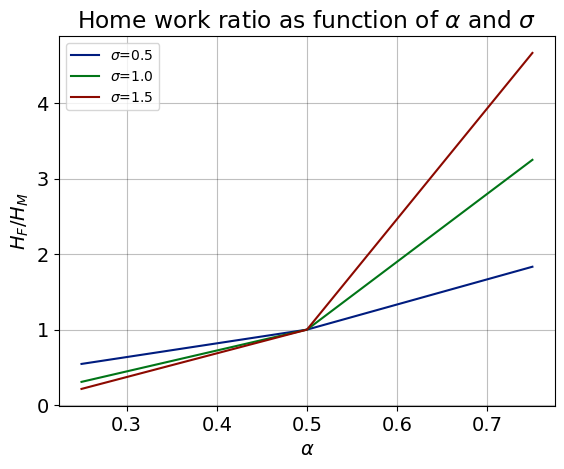

In [121]:
#We set parameters to baseline. We do this to ensure that all code chuncks can be run in random order. 
model.par.alpha = 0.5
model.par.sigma = 1
model.par.wF = 1
model.par.theta = 0 #This parameter is only relevant for extension. See question 5. 

#We construct two vectors of the relevant alphas and sigmas as well as an empty dictionary to store our results
list_alphas = [ 0.25, 0.5, 0.75]
list_sigmas = [ 0.5, 1.0, 1.5]
results_ratio = {}

#We solve the model for each alpha and sigma in the above vectors using a loop
for sigma in list_sigmas:
    model.par.sigma = sigma
    for alpha in list_alphas:
        model.par.alpha = alpha 
        opt = model.solve_discrete() #Calling the model from the class
        results_ratio[(alpha, sigma)] = opt.HF/opt.HM #Storing the optimal HF and HM in order to plot it

# Plotting optimal HF/HM against alpha for each sigma using a loop
fig = plt.figure()
ax= fig.add_subplot()
for sigma in list_sigmas:
    y = [results_ratio[(alpha, sigma)] for alpha in list_alphas]
    ax.plot(list_alphas, y, label=f'$\sigma$={sigma}')
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$H_F/H_M$')
ax.set_title('Home work ratio as function of $\\alpha$ and $\sigma$')
ax.legend(prop={'size': 10})
plt.show()

The figure above show how the ratio of females to males in the home production changes when we change the parameter for female productivity in home production, $\alpha$, and the elasticity of substitution between men and females in home production, $\sigma$. 

We see that:

If women are more productive than men ($\alpha$>0.5), it is optimal for women to work more in home production compared to men and vice versa. 

Since we have set the wage rate of men and females in the labour market equal, $w_M=w_F=1$, men and females will work same number of hours in the home production when there productivity equals, $\alpha=0.5$. 

Changes in the realtive productivity between men and women will have a larger effect on the relative participation in home production when men and women are more substitutable in home production i.e. higher $\sigma$.

# Question 2
In the following question, we will plot and see how the $log\frac{H_F}{H_M}$ changes, when changing the labor wage ratio, $log\frac{w_F}{w_M}$, where the male wage is numeraire. We also print the optimal choices for the different female wages. 

We use the same discrete solver as before and solve for optimal choices for a range of different female wages $w_F$. 

For Wf = 0.80, optimal choices are: LM = 6.00, HM = 4.00, LF = 3.00, HF = 5.00 
For Wf = 0.90, optimal choices are: LM = 5.00, HM = 4.50, LF = 4.00, HF = 4.50 
For Wf = 1.00, optimal choices are: LM = 4.50, HM = 4.50, LF = 4.50, HF = 4.50 
For Wf = 1.10, optimal choices are: LM = 4.00, HM = 4.50, LF = 5.00, HF = 4.00 
For Wf = 1.20, optimal choices are: LM = 3.00, HM = 5.00, LF = 5.50, HF = 4.00 


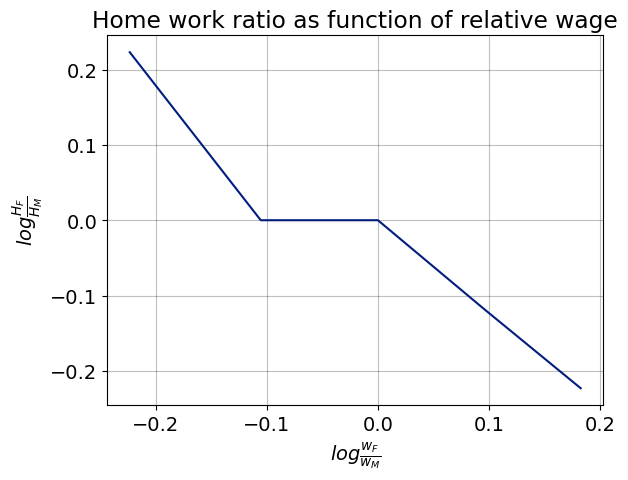

In [122]:
#We set parameters to baseline. We do this to ensure that all code chuncks can be run in random order. 
model.par.alpha = 0.5
model.par.sigma = 1
model.par.wF = 1
model.par.theta = 0 #This parameter is only relevant for extension. See question 5. 

#We construct two empty vectors to store our results for the work ratio and wage ratio
results_workratio = np.empty(5)
results_wageratio = np.empty(5)

#We solve the model for the discrete series of wage ratios using the discrete solver
for i, wF in enumerate(model.par.wF_vec):
    model.par.wF = wF
    opt = model.solve_discrete()
    results_workratio[i] = np.log(opt.HF/opt.HM) #Storing the work ratio
    results_wageratio[i] = np.log(model.par.wF/model.par.wM) #Storing the wage ratio
    print(f'For Wf = {model.par.wF:.2f}, optimal choices are: LM = {opt.LM:.2f}, HM = {opt.HM:.2f}, LF = {opt.LF:.2f}, HF = {opt.HF:.2f} ') #Printing optimal values

#We plot the work ratio against the wage ratio
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(results_wageratio, results_workratio)
ax.set_title('Home work ratio as function of relative wage')
ax.set_xlabel('$log\\frac{w_F}{w_M}$')
ax.set_ylabel('$log\\frac{H_F}{H_M}$');

As expected, the above figure and print show that optimal relative partipation of women in home production decreases with a higher relative labor wage for women. A higher labour wage for women makes their participation in the home production more costly in terms of forgone consumption of consumer goods, why their time devoted to the labor market rises compared to that of men. We have log transformed both the independent and the dependent variable, hence the slope of the graph represents the elasticity of the ratio of female and male in home production to the wage ratio. 

The horizontal part of the graph where changes to the wage ratio does not affect the input in home production is due to the nature of the choice variables being discrete.

# Question 3

In this problem, we want the same output as in question 2, however the choice variables of time devotion will now be continuous. We start out by creating the continious solver called solve (see HouseholdSpecializationModel.py line 119-136). In the code below, we just call the solver as in question 2. 

 For Wf = 0.80, optimal choices are: LM = 5.89, HM = 4.09, LF = 2.87, HF = 5.12
 For Wf = 0.90, optimal choices are: LM = 5.17, HM = 4.27, LF = 3.75, HF = 4.75
 For Wf = 1.00, optimal choices are: LM = 4.45, HM = 4.45, LF = 4.45, HF = 4.45
 For Wf = 1.10, optimal choices are: LM = 3.76, HM = 4.64, LF = 5.02, HF = 4.22
 For Wf = 1.20, optimal choices are: LM = 3.09, HM = 4.83, LF = 5.48, HF = 4.03


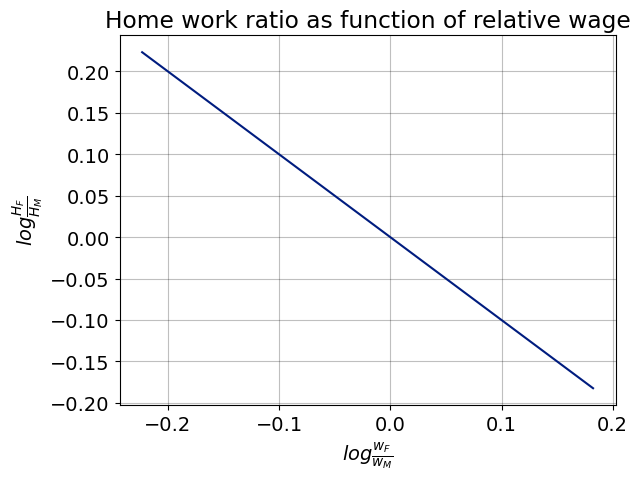

In [123]:
#We set parameters to baseline. We do this to ensure that all code chuncks can be run in random order. 
model.par.alpha = 0.5
model.par.sigma = 1
model.par.wF = 1
model.par.theta = 0 #This parameter is only relevant for extension. See question 5. 

#We construct two empty vectors to store our results for the work ratio and wage ratio
results_con_workratio = np.empty(5)
results_con_wageratio = np.empty(5)

#We solve the model for the discrete series of wage ratios
for i, wF in enumerate(model.par.wF_vec):
    model.par.wF = wF
    opt = model.solve()
    results_con_workratio[i] = np.log(opt.HF/opt.HM) #Storing the work ratio
    results_con_wageratio[i] = np.log(model.par.wF/model.par.wM) #Storing the wage ratio
    print(f' For Wf = {model.par.wF:.2f}, optimal choices are: LM = {opt.LM:.2f}, HM = {opt.HM:.2f}, LF = {opt.LF:.2f}, HF = {opt.HF:.2f}') #Printing optimal values

#We plot the work ratio against the wage ratio
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(results_con_wageratio, results_con_workratio)
ax.set_title('Home work ratio as function of relative wage')
ax.set_xlabel('$log\\frac{w_F}{w_M}$')
ax.set_ylabel('$log\\frac{H_F}{H_M}$');


Since the choice variable now is continuous, the relationship between the relative wage ratio and the participation ratio in home production can be explained by a constant linear slope which again should be interpreted as the elasticity of inputs in home production to the relative wage rate. The above figure and table show that the optimal relative partipation of women in home production decreases with a higher relative labor wage for women.

# Question 4

In the following exercise, we will run a regression of the type $log\frac{H_F}{H_M}=\beta_0+\beta_1log\frac{w_F}{w_M}$, and estimate $\beta_0$ and $\beta_1$ for a range of female wages. Then we will change $\alpha$ and $\sigma$ in order to minimize the squared deviation to the results found by Siminski and Yetsenga (2022), namely $\beta_0 = 0.4$ and $\beta_1 = -0.1$. Specificlly, we will choose $\alpha$ and $\sigma$ such that the following is minimized:

$$(0.4-\beta_0)^2+(-0.1-\beta_1)^2$$

In the HouseholdSpecializationModel.py line 138-150, we start by creating a solver for the vector of female wages called solve_wF_vec. Then we create our function that solves the above minimization problem (line 164-184) called estimate. The function takes the input from solve_wF_vec and runs it through the precoded OLS function in line (153-162) to calculate the $\beta's$. Then it finds the $\alpha$ and $\sigma$ that minimizes the above problem.  

We use the resulting intercept and slope coefficients that has minimized the squared deviation in a function that loops over the independent variable, the relative wage ratio, in order to create point estimates for the dependent variable to use in the figure. We denote this Model 1. 

 S&Y results: beta0 = 0.4, beta1 = -0.1
 Model 1: beta0 = 0.4000, beta1 = -0.1000, deviation = 0.0000, alpha = 0.9820, sigma = 0.1000


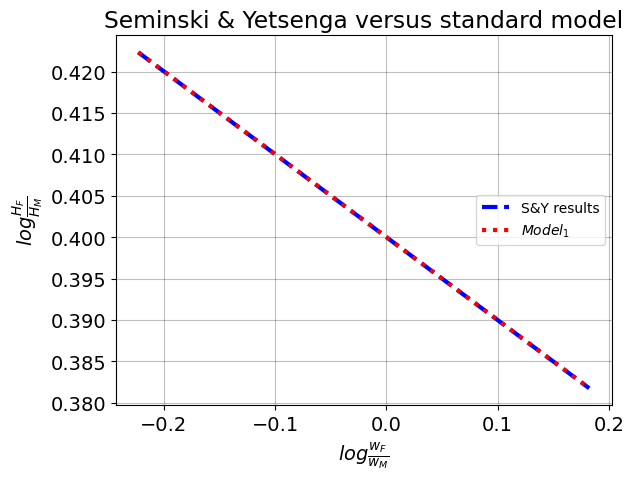

In [129]:
#We set parameters to baseline. We do this to ensure that all code chuncks can be run in random order. 
model.par.alpha = 0.5
model.par.sigma = 1
model.par.wF = 1
model.par.theta = 0 #This parameter is only relevant for extension. See question 5. 

#We use our estimate function to find optimal alpha and sigma
model.estimate()
#We store the betas
beta0_hat = model.sol.beta0 
beta1_hat = model.sol.beta1
#We print the true betas and the betas from our optimized model
print(f' S&Y results: beta0 = {0.4}, beta1 = {-0.1}')
print(f' Model 1: beta0 = {model.sol.beta0:.4f}, beta1 = {model.sol.beta1:.4f}, deviation = {((0.4-model.sol.beta0)**2+(-0.1- model.sol.beta1)**2):.4f}, alpha = {model.par.alpha:.4f}, sigma = {model.par.sigma:.4f}')

#We create two empty vectors to store results of the model prediction using the 'true' estimators and the estimators from the model
pointestimates_data = np.empty(5)
pointestimates_model = np.empty(5)


#For each female wage in the vector, we compute model predictions  of home work ratio for the 'true' estimators and the estimators from the model
for i, wF in enumerate(model.par.wF_vec):
    model.par.wF = wF
    pointestimates_model[i] = beta0_hat + beta1_hat*np.log(wF/model.par.wM)
    pointestimates_data[i] = 0.4 - 0.1*np.log(wF/model.par.wM)

#We plot the estimates of work ratio as function of wage ratio based on 'true' estimators and estimators from the model
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.log(model.par.wF_vec), pointestimates_data, label = 'S&Y results', color = 'b', linestyle='--', alpha= 1, linewidth = 3)
ax.plot(np.log(model.par.wF_vec), pointestimates_model, label = '$Model_1$', color = 'r', linestyle = ':', alpha=1, linewidth = 3)
ax.set_title('Seminski & Yetsenga versus standard model')
ax.set_xlabel('$log\\frac{w_F}{w_M}$')
ax.set_ylabel('$log\\frac{H_F}{H_M}$')
ax.legend(loc=5, prop={'size': 10}) ;

Our results above show that when $\alpha=0.982$ and $\sigma=0.1$ w have zero deviation to the result by Siminski and Yetsenga. This parameterization of the model means that women is a lot more productive than men in home production and that the home work input for men and women needs to be complementaries.

With respect to economic intuition, it does not seem realistic that men are almost useless in home production ($\alpha$ close to 1). 

# Question 5

In question 4 we found that our model only matches the data if $\alpha=0.982$ and $\sigma=0.1$. Empirical evidence show that $\alpha=0.5$. 

In this question, we start out by minimizing the same function as in question 4, but now holdning $\alpha$ fixed at 0.5 and only varying $\sigma$ (see estimatev2 in line 187-198 in HouseholdSpecilizationModel.py). We call the new estimates model 2 and print the result of the $\beta's$ and compare them to the findings of Seminski and Yetsenga.

In [126]:
#We set parameters to baseline. We do this to ensure that all code chuncks can be run in random order. 
model.par.alpha = 0.5
model.par.sigma = 1
model.par.wF = 1
model.par.theta = 0 #This parameter is only relevant for extension. See question 5. 

#We make a new estimator named estimatev2 (see py file line 187-198) that minimizes squarred deviations from true betas holding alpha fixed and varying sigma
model.estimatev2()
#We store the betas from the above estimation
beta0_hat2 = model.sol.beta0
beta1_hat2 = model.sol.beta1
print(f' Model 2: beta0 = {model.sol.beta0:.4f}, beta1 = {model.sol.beta1:.4f}, deviation = {((0.4-model.sol.beta0)**2+(-0.1- model.sol.beta1)**2):.4f}, alpha = {model.par.alpha:.4f}, sigma = {model.par.sigma:.4f}')


 Model 2: beta0 = 0.0000, beta1 = -0.0988, deviation = 0.1600, alpha = 0.5000, sigma = 0.0988


Expectedly, we see that when females and males are equally productive in home production, the intercept coefficient $\beta_0$ is zero. The intuition follows our earlier result from question 1 given that females and males receive same labor wage.

Thus, we need to modify our model such that it matches the result by Seminski and Yetsenga. We do this by decreasing the disutility experienced by women working in home production. Specifically, we substract a share, $\theta$, of the female hours devoted to home production in their utility. The new disutility term in the utility function thus looks like the following (see line 77 in HouseholdSpecializationModel.py):
$$v\left(\frac{T_M^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}+\frac{(T_F-\theta*H_F)^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}\right)$$

We then find the $\sigma$ and $\theta$ that makes the model estimates best match the results of Seminski and Yetsenga (see the function estimate v3 in line 201-213 in HouseholdSpecializationModel.py). We call this estimate model 3. 

Lastly, we plot point estimates using the betas of Seminski and Yetsenga and the betas from model 1, model 2, and model 3.



 Model 3: beta0 = 0.4000, beta1 = -0.1000, deviation = 0.0000, alpha = 0.5000, sigma = 0.1306, theta = 0.9518


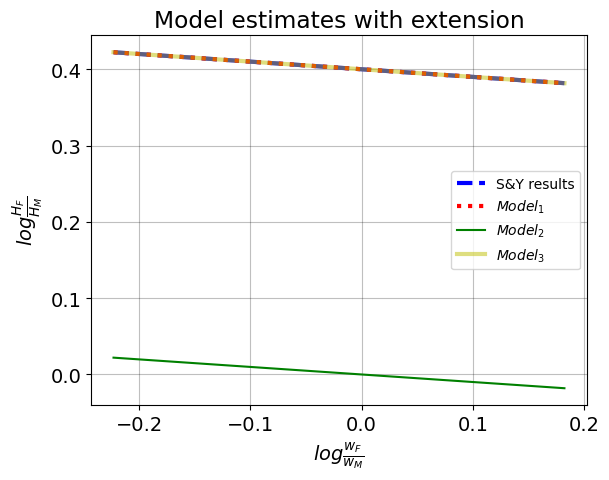

In [132]:
#We set parameters to baseline. We do this to ensure that all code chuncks can be run in random order. 
model.par.alpha = 0.5
model.par.sigma = 1
model.par.wF = 1
model.par.theta = 0 #This parameter is only relevant for extension. See question 5.

#We find theta and sigma that makes model best match the data
model.par.sigma = 1
model.estimatev3()
#We store the betas from the above estimation
beta0_hat3 = model.sol.beta0
beta1_hat3 = model.sol.beta1
print(f' Model 3: beta0 = {model.sol.beta0:.4f}, beta1 = {model.sol.beta1:.4f}, deviation = {((0.4-model.sol.beta0)**2+(-0.1- model.sol.beta1)**2):.4f}, alpha = {model.par.alpha:.4f}, sigma = {model.par.sigma:.4f}, theta = {model.par.theta:.4f}')

#We reset the new parameter
model.par.ext = 0

#We create two empty vectors to store results of the model prediction of home work ratio for model 2 and model 3
pointestimates_model2 = np.empty(5)
pointestimates_model3 = np.empty(5)

#For each female wage in the vector, we compute model predictions of home work ratio for model 2 and model 3
for i, wF in enumerate(model.par.wF_vec):
    model.par.wF = wF
    pointestimates_model2[i] = beta0_hat2 + beta1_hat2*np.log(wF/model.par.wM)
    pointestimates_model3[i] = beta0_hat3 + beta1_hat3*np.log(wF/model.par.wM)


#We plot the work ratio against the wage ratio for the data and our three models
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.log(model.par.wF_vec), pointestimates_data, label = 'S&Y results', color = 'b', linestyle='--', alpha= 1, linewidth = 3)
ax.plot(np.log(model.par.wF_vec), pointestimates_model, label = '$Model_1$', color = 'r', linestyle = ':', alpha=1, linewidth = 3)
ax.plot(np.log(model.par.wF_vec), pointestimates_model2, label = '$Model_2$', color= 'g' )
ax.plot(np.log(model.par.wF_vec), pointestimates_model3, label = '$Model_3$', color = 'y', linestyle = 'solid', alpha= 0.5, linewidth = 3)
ax.set_title('Model estimates with extension')
ax.set_xlabel('$log\\frac{w_F}{w_M}$')
ax.set_ylabel('$log\\frac{H_F}{H_M}$')
ax.legend(loc=5, prop={'size': 10}) ;


The above graph shows that, using our model extension, the solver is able to identify parameter values of $\sigma$ and $\theta$ such that the squared deviation is zero. Compared to the our first model, the substitutability between men and females in home production, $\sigma$, has not changed significantly. However, we are able to match the data by Siminski and Yetsenga with a $\theta$ of 0.95 which, in the light of our model specification, means that women do not experience disutility from 95% of their time devotion to home labor.